In [5]:
import cv2                                # state of the art computer vision algorithms library
import numpy as np                        # fundamental package for scientific computing
import matplotlib.pyplot as plt           # 2D plotting library producing publication quality figures
import pyrealsense2 as rs                 # Intel RealSense cross-platform open-source API
print("Environment Ready")


Environment Ready


In [16]:
# this script will first filter out the hand
# First import the library
import pyrealsense2 as rs
# Import Numpy for easy array manipulation
import numpy as np
# Import OpenCV for easy image rendering
import cv2

# Create a pipeline
pipeline = rs.pipeline()

#Create a config and configure the pipeline to stream
#  different resolutions of color and depth streams
config = rs.config()
config.enable_stream(rs.stream.depth, 640, 480, rs.format.z16, 30)
config.enable_stream(rs.stream.color, 640, 480, rs.format.bgr8, 30)

# Start streaming
profile = pipeline.start(config)

# Getting the depth sensor's depth scale (see rs-align example for explanation)
depth_sensor = profile.get_device().first_depth_sensor()
depth_scale = depth_sensor.get_depth_scale()
print("Depth Scale is: " , depth_scale)

# We will be removing the background of objects more than
#  clipping_distance_in_meters meters away
clipping_distance_in_meters = 1 #1 meter
clipping_distance = clipping_distance_in_meters / depth_scale

# Create an align object
# rs.align allows us to perform alignment of depth frames to others frames
# The "align_to" is the stream type to which we plan to align depth frames.
align_to = rs.stream.color
align = rs.align(align_to)

# Streaming loop
try:
    while True:
        # Get frameset of color and depth
        frames = pipeline.wait_for_frames()
        # frames.get_depth_frame() is a 640x360 depth image

        # Align the depth frame to color frame
        aligned_frames = align.process(frames)

        # Get aligned frames
        aligned_depth_frame = aligned_frames.get_depth_frame() # aligned_depth_frame is a 640x480 depth image
        color_frame = aligned_frames.get_color_frame()

        # Validate that both frames are valid
        if not aligned_depth_frame or not color_frame:
            continue

        depth_image = np.asanyarray(aligned_depth_frame.get_data())
        color_image = np.asanyarray(color_frame.get_data())

        colorizer = rs.colorizer()
        colorized_depth = np.asanyarray(colorizer.colorize(aligned_depth_frame).get_data())


        # Remove background - Set pixels further than clipping_distance to grey
        grey_color = 153
        depth_image_3d = np.dstack((depth_image,depth_image,depth_image)) #depth image is 1 channel, color is 3 channels
        bg_removed = np.where((depth_image_3d > clipping_distance) | (depth_image_3d <= 0), grey_color, color_image)

        # Render images
        depth_colormap = cv2.applyColorMap(cv2.convertScaleAbs(depth_image, alpha=0.03), cv2.COLORMAP_JET)
        images = np.hstack((bg_removed, depth_colormap))
        cv2.namedWindow('Align Example', cv2.WINDOW_AUTOSIZE)
        cv2.imshow('Align Example', colorized_depth)
        key = cv2.waitKey(1)
        # Press esc or 'q' to close the image window
        if key & 0xFF == ord('q') or key == 27:
            cv2.destroyAllWindows()
            break
finally:
    pipeline.stop()

Depth Scale is:  0.0010000000474974513


In [19]:


import cv2                                # state of the art computer vision algorithms library
import numpy as np                        # fundamental package for scientific computing
import matplotlib.pyplot as plt           # 2D plotting library producing publication quality figures
import pyrealsense2 as rs                 # Intel RealSense cross-platform open-source API
print("Environment Ready")


# Create a pipeline
pipeline = rs.pipeline()

#Create a config and configure the pipeline to stream
#  different resolutions of color and depth streams
config = rs.config()
config.enable_stream(rs.stream.depth, 640, 480, rs.format.z16, 30)
config.enable_stream(rs.stream.color, 640, 480, rs.format.bgr8, 30)

# Start streaming
profile = pipeline.start(config)

# Getting the depth sensor's depth scale (see rs-align example for explanation)
depth_sensor = profile.get_device().first_depth_sensor()
depth_scale = depth_sensor.get_depth_scale()
print("Depth Scale is: " , depth_scale)

# We will be removing the background of objects more than
#  clipping_distance_in_meters meters away
clipping_distance_in_meters = 0.2 # 0.2 m
clipping_distance = clipping_distance_in_meters / depth_scale

# Create an align object
# rs.align allows us to perform alignment of depth frames to others frames
# The "align_to" is the stream type to which we plan to align depth frames.
align_to = rs.stream.color
align = rs.align(align_to)

# Streaming loop

# Get frameset of color and depth
frames = pipeline.wait_for_frames()
# frames.get_depth_frame() is a 640x360 depth image


# Align the depth frame to color frame
aligned_frames = align.process(frames)

# Get aligned frames
aligned_depth_frame = aligned_frames.get_depth_frame() # aligned_depth_frame is a 640x480 depth image
color_frame = aligned_frames.get_color_frame()
depth_frame = aligned_frames.get_depth_frame()

# Validate that both frames are valid
if not aligned_depth_frame or not color_frame:
    pass



Environment Ready
Depth Scale is:  0.0010000000474974513


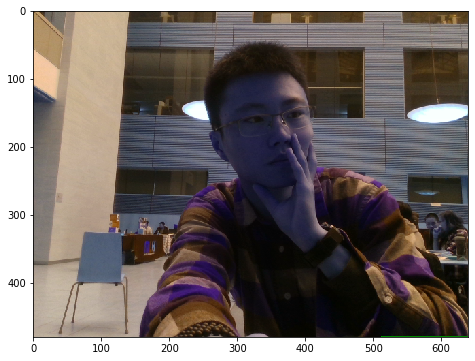

In [20]:
color = np.asanyarray(color_frame.get_data())
plt.rcParams["axes.grid"] = False
plt.rcParams['figure.figsize'] = [12, 6]
plt.imshow(color)

(480, 640, 3)

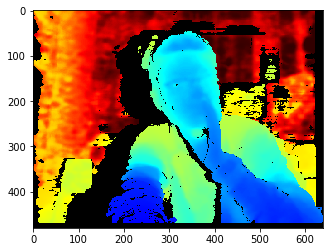

In [21]:
colorizer = rs.colorizer()
colorized_depth = np.asanyarray(colorizer.colorize(aligned_depth_frame).get_data())

import matplotlib.pyplot as plt
plt.rcParams["axes.grid"] = False
plt.rcParams['figure.figsize'] = [8, 4]
plt.imshow(colorized_depth)

colorized_depth.shape

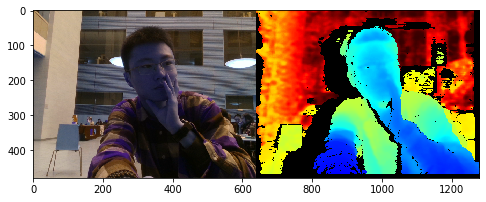

In [22]:
# Create alignment primitive with color as its target stream:
align = rs.align(rs.stream.color)
frameset = align.process(frames)

# Update color and depth frames:
aligned_depth_frame = frameset.get_depth_frame()
colorized_depth = np.asanyarray(colorizer.colorize(aligned_depth_frame).get_data())

# Show the two frames together:
images = np.hstack((color, colorized_depth))
plt.imshow(images)

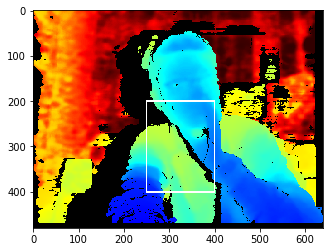

In [23]:
cv2.rectangle(colorized_depth, (250, 200), 
             (400, 400), (255, 255, 255), 2)
plt.imshow(colorized_depth)

In [43]:
depth_scale = profile.get_device().first_depth_sensor().get_depth_scale()
depth = np.asanyarray(aligned_depth_frame.get_data())
# Crop depth data:
print(depth.shape)
min = np.amax(depth)
initial_distance = 0.2
noise_filter = initial_distance / depth_scale
index_x = 0
index_y = 0
for i in range(0, depth.shape[0]):
    for j in range(0, depth.shape[1]):
        if depth[i, j] < min and depth[i, j] != 0 and depth[i, j] > noise_filter:
            min = depth[i, j]
            index_x, index_y = i, j
print(min, index_x, index_y)

depth = depth[250:400,250:400].astype(float)
# Get data scale from the device and convert to meters

min = min * depth_scale
# dist,_,_,_ = cv2.mean(depth)
# dist
min

(480, 640)
328 467 267


0.32800001557916403

In [ ]:
## License: Apache 2.0. See LICENSE file in root directory.
## Copyright(c) 2017 Intel Corporation. All Rights Reserved.

#####################################################
##              Align Depth to Color               ##
#####################################################

# First import the library
import pyrealsense2 as rs
# Import Numpy for easy array manipulation
import numpy as np
# Import OpenCV for easy image rendering
import cv2, imutils

import os
# Create a pipeline
pipeline = rs.pipeline()

#Create a config and configure the pipeline to stream
#  different resolutions of color and depth streams
config = rs.config()
config.enable_stream(rs.stream.depth, 640, 480, rs.format.z16, 30)
config.enable_stream(rs.stream.color, 640, 480, rs.format.bgr8, 30)

# Start streaming
profile = pipeline.start(config)

# Getting the depth sensor's depth scale (see rs-align example for explanation)
depth_sensor = profile.get_device().first_depth_sensor()
depth_scale = depth_sensor.get_depth_scale()
print("Depth Scale is: " , depth_scale)

# We will be removing the background of objects more than
#  clipping_distance_in_meters meters away

# Create an align object
# rs.align allows us to perform alignment of depth frames to others frames
# The "align_to" is the stream type to which we plan to align depth frames.
align_to = rs.stream.color
align = rs.align(align_to)

# Load the model
from keras.models import model_from_json
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

loaded_model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

lookup = dict()
reverselookup = dict()
count = 0
for j in os.listdir('../input/leapgestrecog/leapGestRecog/00/'):
    if not j.startswith('.'): # If running this code locally, this is to 
                              # ensure you aren't reading in hidden folders
        lookup[j] = count
        reverselookup[count] = j
        count = count + 1


clipping_distance_in_meters = 1 #1 meter
last_radius = 640

# Streaming loop
try:
    while True:
        # Get frameset of color and depth
        frames = pipeline.wait_for_frames()
        # frames.get_depth_frame() is a 640x360 depth image

        # Align the depth frame to color frame
        aligned_frames = align.process(frames)

        # Get aligned frames
        aligned_depth_frame = aligned_frames.get_depth_frame() # aligned_depth_frame is a 640x480 depth image
        color_frame = aligned_frames.get_color_frame()

        # Validate that both frames are valid
        if not aligned_depth_frame or not color_frame:
            continue

        depth_image = np.asanyarray(aligned_depth_frame.get_data())
        color_image = np.asanyarray(color_frame.get_data())

        # Remove background - Set pixels further than clipping_distance to grey
        grey_color = 153
        white_color = 255
        black_color = 0
        depth_image_3d = np.dstack((depth_image,depth_image,depth_image)) #depth image is 1 channel, color is 3 channels
        bg_removed = np.where((depth_image_3d > clipping_distance_in_meters / depth_scale ) | (depth_image_3d <= 0), black_color, color_image)
        blurred = cv2.GaussianBlur(bg_removed, (11, 11), 0)
        

        mask = cv2.inRange(blurred, (0, 0, 0), (1, 1, 1))
        mask = cv2.bitwise_not(mask)
        mask = cv2.erode(mask, None, iterations=2)
        mask = cv2.dilate(mask, None, iterations=2)
        
        # gray image
#         blurred = cv2.GaussianBlur(bg_removed, (11, 11), 0)
#         hsv = cv2.cvtColor(blurred, cv2.COLOR_BGR2HSV)
        
        # Find the shortest distance
        depth_scale = profile.get_device().first_depth_sensor().get_depth_scale()
        depth = np.asanyarray(aligned_depth_frame.get_data())
        # Crop depth data:
        min = np.amax(depth)
        initial_distance = 0.4
        noise_filter = initial_distance / depth_scale
        index_x = 0
        index_y = 0
        for i in range(0, depth.shape[0]):
            for j in range(0, depth.shape[1]):
                if depth[i, j] < min and depth[i, j] != 0 and depth[i, j] > noise_filter:
                    min = depth[i, j]
                    index_x, index_y = i, j
#         print(min, index_x, index_y)
        clipping_distance_in_meters = min * depth_scale
        
        font = cv2.FONT_HERSHEY_SIMPLEX 
        org = (bg_removed.shape[0] - 50, 50) 
        fontScale = 1 
        color = (0, 0, 255) 
        thickness = 2
        bg_removed = cv2.putText(bg_removed, str(clipping_distance_in_meters), org, font, fontScale, color, thickness, cv2.LINE_AA) 
        
        clipping_distance_in_meters += 0.15
        
        
        # find contours in the mask and initialize the current
        # (x, y) center of the ball
        cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,
            cv2.CHAIN_APPROX_SIMPLE)
        cnts = imutils.grab_contours(cnts)
        center = None
        gray_hand = None
        
        # only proceed if at least one contour was found
        if len(cnts) > 0:
            # find the largest contour in the mask, then use
            # it to compute the minimum enclosing circle and
            # centroid
            c = max(cnts, key=cv2.contourArea)
            ((x, y), radius) = cv2.minEnclosingCircle(c)
            M = cv2.moments(c)
            center = (int(M["m10"] / M["m00"]), int(M["m01"] / M["m00"]))

            # only proceed if the radius meets a minimum size
#             if radius > 10 and center[0] > 60 and center[0] < bg_removed.shape[0] - 60 and center[1] > 160 and center[1] < bg_removed.shape[1]-160:
            if radius > 10:
                # draw the circle and centroid on the frame,
                # then update the list of tracked points
                cv2.circle(bg_removed, (int(x), int(y)), int(radius),
                    (0, 255, 255), 2)
                cv2.circle(bg_removed, center, 5, (0, 0, 255), -1)
                font = cv2.FONT_HERSHEY_SIMPLEX 
                fontScale = 1 
                color = (0, 0, 255) 
                thickness = 2
                radius_location = (50, 100)
                bg_removed = cv2.putText(bg_removed, str(radius), radius_location, font, fontScale, color, thickness, cv2.LINE_AA) 
                # if the radius decrease 30 % and still more, call it close
                if radius < last_radius * 0.75:
                    close = (50, 50)
                    bg_removed = cv2.putText(bg_removed, "Closed", close, font, fontScale, color, thickness, cv2.LINE_AA)    
                last_radius = radius
                
                if center[0] > 60 and center[0] < bg_removed.shape[0] - 60 and center[1] > 160 and center[1] < bg_removed.shape[1]-160:
                    # need 120 * 320
                    hand = bg_removed[(center[0]-60):(center[0]+60), center[1]-160:center[1]+160]

                    gray_hand = cv2.cvtColor(hand, cv2.COLOR_BGR2GRAY).reshape((1, 120, 320, 1))

                    output = loaded_model.predict_classes(gray_hand)

                    cnn = (bg_removed.shape[0] - 50, 100)
                    bg_removed = cv2.putText(bg_removed, reverselookup[output[0]], cnn, font, fontScale, color, thickness, cv2.LINE_AA) 
                
                

        # update the points queue
#         pts.appendleft(center)

        # cut out the fist
        

        cv2.namedWindow('background Example', cv2.WINDOW_AUTOSIZE)
#         cv2.namedWindow('hand', cv2.WINDOW_AUTOSIZE)
        cv2.imshow('background Example', bg_removed)
#         if gray_hand is not None:
#             cv2.imshow('hand', gray_hand[0, :, :, 0])
        key = cv2.waitKey(1)
        # Press esc or 'q' to close the image window
        if key & 0xFF == ord('q') or key == 27:
            cv2.destroyAllWindows()
            break
finally:
    pipeline.stop()

Depth Scale is:  0.0010000000474974513
Loaded model from disk
